<a href="https://colab.research.google.com/github/ismael-rtellez/Clustering_series_assignment/blob/main/Clustering_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1 & 7
---
*  [Problem 1] Determine the initial value of the center point
*  [Problem 2] Creation of a function to obtain SSE
*  [Problem 3] Allocation to cluster
*  [Problem 4] Movement of the center point
*  [Problem 5] Repeat
*  [Problem 6] Calculate with different initial values
*  [Problem 7] Estimate

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

# artificial dataset for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)


In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    # Problem 1: Determinate the initial value of the center point
    def _init_centers(self, X):
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    # Problem 2: Creation of a function to obtain SSE
    def _creation_SSE(self, X, labels, centers):
        sse = 0
        for k in range(self.n_clusters):
            sse += np.sum((X[labels == k] - centers[k]) ** 2)
        return sse

    # Problem 3: Allocation to cluster
    def _assign_cluster(self, X, centers):
        labels = np.array([
            np.argmin([np.linalg.norm(x - c) for c in centers])
            for x in X
        ])
        return labels

    # Problem 4: Movement of the center point
    def _update_centers(self, X, labels):
        centers = np.array([
            X[labels==k].mean(axis=0) if len(X[labels==k]) > 0 else np.zeros(X.shape[1])
            for k in range(self.n_clusters)
        ])
        return centers


    # Problem 5 and 6: Repeat and Calculate with different initial value
    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        best_sse = np.inf
        best_centers = None
        best_labels = None

        for init_num in range(self.n_init):
            centers = self._init_centers(X)

            for i in range(self.max_iter):
                labels = self._assign_cluster(X, centers)
                new_centers = self._update_centers(X, labels)
                shift = np.sum(np.linalg.norm(centers - new_centers, axis = 1))

                if self.verbose:
                    print(f"Init {init_num+1}, Iter {i+1}, SSE: {self._creation_SSE(X, labels, centers)}, Shift: {shift:.4f}")

                if shift <= self.tol:
                    break

                centers = new_centers

            sse = self._creation_SSE(X, labels, centers)
            if sse < best_sse:
                best_sse = sse
                best_centers = centers
                best_labels = labels

        self.centers = best_centers
        self.labels = best_labels
        self.sse_ = best_sse

    # Problem 7: Estimate
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        return self._assign_cluster(X, self.centers)



Init 1, Iter 1, SSE: 504.51383191488304, Shift: 4.2629
Init 1, Iter 2, SSE: 157.3208689201963, Shift: 2.6774
Init 1, Iter 3, SSE: 88.29586872263718, Shift: 1.4128
Init 1, Iter 4, SSE: 52.16270372679393, Shift: 0.5131
Init 1, Iter 5, SSE: 48.63378320706403, Shift: 0.0000
Init 2, Iter 1, SSE: 84.70643045064892, Shift: 2.2889
Init 2, Iter 2, SSE: 48.63378320706403, Shift: 0.0000
Init 3, Iter 1, SSE: 434.6015932030838, Shift: 4.3019
Init 3, Iter 2, SSE: 83.46813337483201, Shift: 1.5523
Init 3, Iter 3, SSE: 48.63378320706403, Shift: 0.0000
Init 4, Iter 1, SSE: 159.05827418937034, Shift: 2.9761
Init 4, Iter 2, SSE: 56.08271473983609, Shift: 0.7387
Init 4, Iter 3, SSE: 49.212954505804106, Shift: 0.2142
Init 4, Iter 4, SSE: 48.63378320706403, Shift: 0.0000
Init 5, Iter 1, SSE: 593.7404299932115, Shift: 4.8897
Init 5, Iter 2, SSE: 164.4430945816862, Shift: 2.9208
Init 5, Iter 3, SSE: 49.06584302401431, Shift: 0.1635
Init 5, Iter 4, SSE: 48.63378320706403, Shift: 0.0000
Final SSE:  48.6337832070

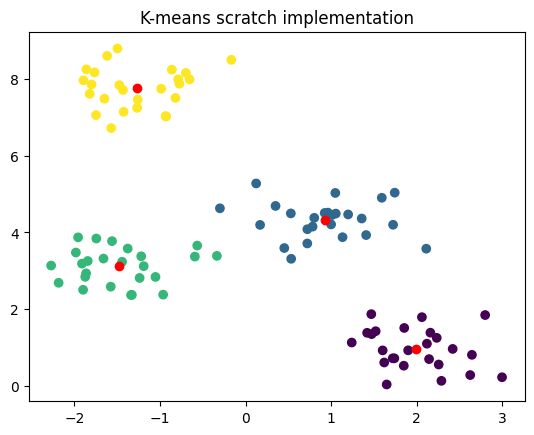

In [ ]:
# Running Scracth K-means
kmeans = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, tol=1e-4, verbose=True)
kmeans.fit(X)

print("Final SSE: ", kmeans.sse_)

#plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', marker='o')
plt.title("K-means scratch implementation")
plt.show()

### Problem 8: Implementation of elbow method

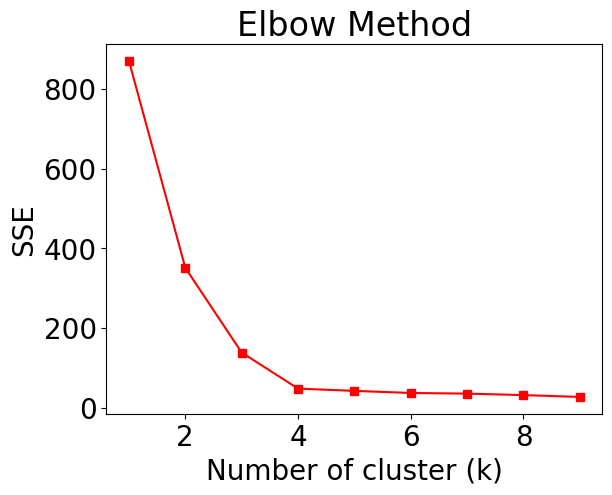

In [ ]:
# Problem 8: Implementation of elbow method

sse_list = []
k_range = range(1, 10)

for k in k_range:
    km = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-4)
    km.fit(X)
    sse_list.append(km.sse_)

plt.plot(k_range, sse_list, 'rs-')
plt.xlabel('Number of cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

### Problem 9: (Ab¿dvanced assignment) Silhouette diagram

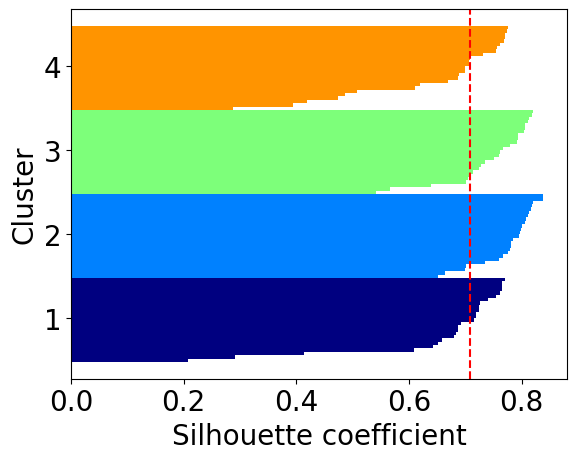

In [ ]:
# problem 9: (Ab¿dvanced assignment) Silhouette diagram

from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=4, random_state=0)
y_km1 = km1.fit_predict(X)
silhouette_vals = silhouette_samples(X, y_km1)
silhouette_avg = silhouette_score(X, y_km1)
cluster_labels = np.unique(y_km1)
n_clusters = len(cluster_labels)


y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()

### Problem 10:  Selection of the number of cluster k

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

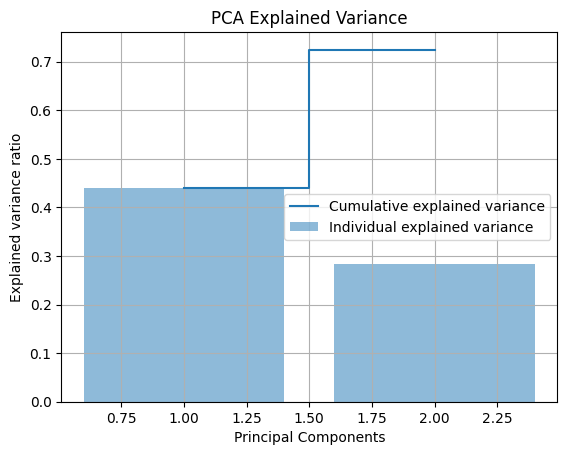

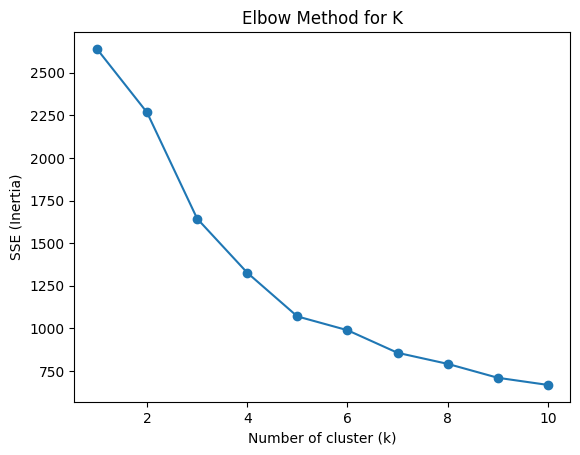

Average silhouette score:  0.4582633767207058


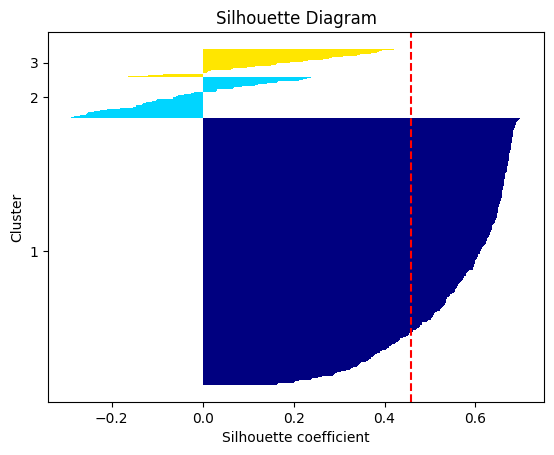

In [ ]:
# 3. Cluster Analysis

# Problem 10:  Selection of the number of cluster k

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE

# loading and inspect data
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Wholesale customers data.csv")
print(data.head())
print(data.info())

# drop region & channel for clustering (monetary only)
X = data.drop(['Region', 'Channel'], axis=1)

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using PCA to visualize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting explained variance
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained varinace: ", cum_var_exp)

plt.bar(range(1, 3), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 3), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()

# Using elbow method
sse = []
k_ranges = range(1, 11)
for k in k_ranges:
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(X_scaled)
    sse.append(kmean.inertia_)

plt.plot(k_ranges, sse, marker='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for K')
plt.show()

# Silhouette analysis for k
k = 3
kmean = KMeans(n_clusters=k, random_state=42)
labels = kmean.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, labels)
print('Average silhouette score: ', silhouette_avg)

# Silhouette diagram
sil_vals = silhouette_samples(X_scaled, labels)
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i in range(k):
    c_silhouette_vals = sil_vals[labels == i]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / k)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, [str(i+1) for i in range(k)])
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.title("Silhouette Diagram")
plt.show()

**Explanation**
In an attemp to arrive at the most appropiate value of k, I employed the Elbow Method as well as Silhouette Analysis.

The Elbow plot revealed a visible bend at k=3, which means that there is diminishing returns to lowering SSE after k=3. Also the mean silhouette value of k=3 was roughly 0.458 implying that the clusters formed are quite separate.

Businesswise, the choice of k=3 clusters seems feasible as well since a wholesaler can segment the customers into identifiable groups (e.g., small retailers, large retailers, and restaurants), which are convenient to be interpreted and respond to. Thus, the most reasonable and best balanced number of cluster was 3 for me.

### Problem 11: Comparison with known groups

In [ ]:
# Problem 11: Comparison with known groups
# Attaching cluster labels to original data
data['Cluster'] = labels

# Comparison clusters with Region and  Channel
print("\nComparison with Region:")
print(pd.crosstab(data['Region'], data['Cluster']))

print("\nComparison with Channel:")
print(pd.crosstab(data['Channel'], data['Cluster']))


Comparison with Region:
Cluster    0   1   2
Region              
1         63   7   7
2         37   2   8
3        250  44  22

Comparison with Channel:
Cluster    0   1   2
Channel             
1        251  47   0
2         99   6  37


**Explanation**
Having done K-Means clustering (k=3), I compared the emergent cluster with what is known as Region and Channel labels in the dataset and was not seen in the clustering. I observed that:
*  Cluster 0 has both of Channel 1 and Channel 2 customers (mostly Channel 1)
*  Cluster 1 is dominated by Channel 1
*  Cluster 2 comprises only of the Channel 2 customers  

The comparison with Region indicated that there was wider distribution of cluster 0 in all regions and further, that Cluster 1 and Cluster 2 are confined mainly to Region 3

These finding indicate that K-Means cluster may not reflect the known categories of Channel or Region identities. This implies that centroid modeling of expenditure patterns does not bring a clear picture of what the regional and channel groupings do but brings out a clear picture on customer segmentation.

### Problem 12: Useful information for wholesalers

In [ ]:
from __future__ import print_function
# Problem 12: Useful information for wholesalers
# View mean spending per cluster
summary = data.groupby('Cluster').mean()
print("\nCluster Summary stats: ")
print(summary)


Cluster Summary stats: 
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


**Explanation**
Analysis of means of spending patterns in each cluster (on the raw, original, non-sacled data) yield three different profiles of customer:
*  Cluster 1 has insanely high expenditure on Fresh and Frozen items indicating that most likely these are restaurants or food service companies that are dependent on perishable raw materials.
*  Cluster 2 is very highly spent on Milk, Grocery and Detergents_Paper which shows that most likely these customers are the large retail store or supermarkets
*  Cluster 0 also spends moderately and fairly evenly in every category, probably, small local shops or mixed-use enterprises.

This particular segmentation can be very useful to the wholesale by enabling them to:
*  Personalize promotions and offers (e.g. promotion of fresh items to Cluster 1)
*  Planning and logistic should be optimized according to the buying behavior
*  Identify and possibility to urge sell, or even pair products, which may suit a particular group

### Problem 13: (Advanced assignment) Investigation of other methods


**DBSCAN**   
Advantages:
*  May incut non-spherical shapes (not only in their clusters as in K_Means)
*  Identifies automatically outliers (marked as noise)
*  There is no need of predetermining the number of cluster (k)

Disadvantages:
*  There is degraded perfonmance in high-dimensional data.
*  Has to be fine-tuned (eps (radius)) and min_samples (minimum points per cluster)
*  Different density clustering is difficult to separate in a proper way

**t-SNE**   
Advantages:
*  Effective when visualizing high dimension data as either 2D or 3D
*  Keeps well the local structures - the same point tend to remain togheter

Disadvantages:
*  Slow and heavily computationally by large datasets
*  Does not serve as general dimensionally reduction to clustering - used primarily as a visualization
*  Hyper-sensitive to hyperperameters (perplexity)

**LLE**   
Advantages:
*  Mantains the local neighborhood relations in reduced dimensions
*  Non-linear dimensionality reduction- they are suitable in manifold learning

Disadvantages:
*  Noise sensitive
*  This might not work when the manifold assumption is weak
*  It does not give a specific mapping of new data points (non-parametric)

### Problem 14: (Advanced assignment) Use of t-SNE and DBSCAN

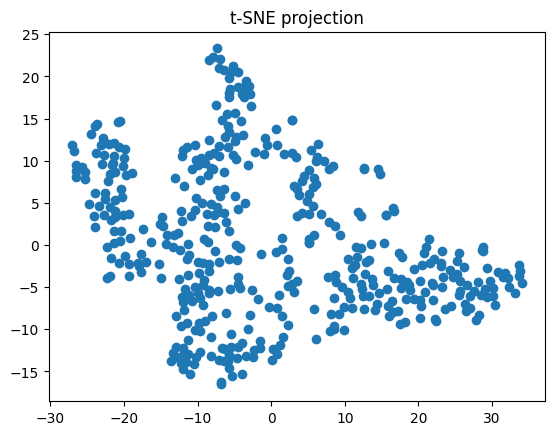

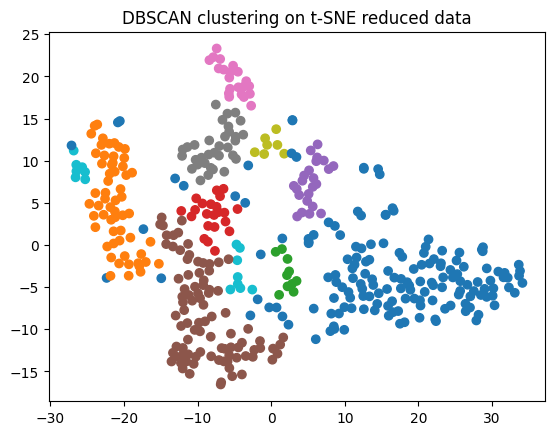

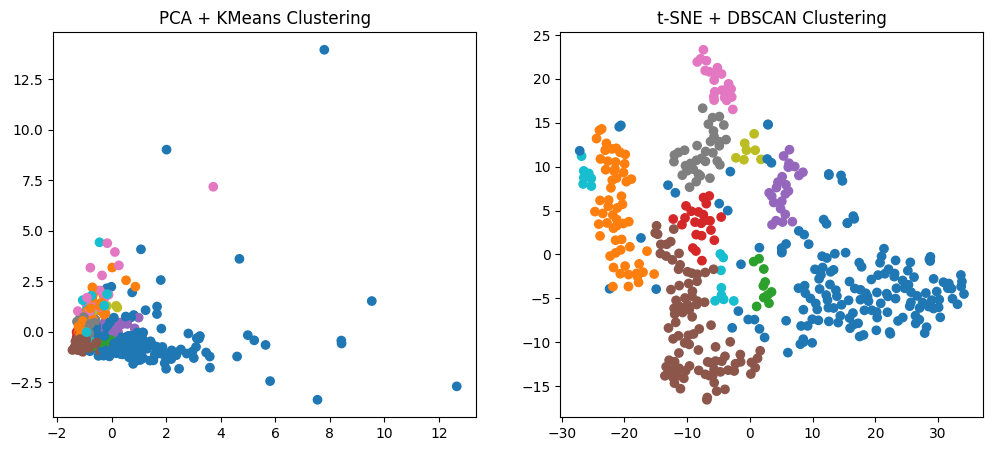

In [ ]:
# Problem 14: (Advanced assignment) Use of t-SNE and DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Applying t-SNE for 2D embedding
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE projection")
plt.show()

# Using DBSCAN on t-SNE reduced data
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(X_tsne)

# Plotting DBSCAN clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='tab10')
plt.title("DBSCAN clustering on t-SNE reduced data")
plt.show()

# Comparing with original PCA+KMeans
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10')
plt.title("PCA + KMeans Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='tab10')
plt.title("t-SNE + DBSCAN Clustering")

plt.show()